In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option("display.max_columns", 100)
pd.set_option("precision", 5)
%pylab inline
from tqdm import tqdm_notebook

from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/Users/mario/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [8]:
data = pd.read_csv("continuous_factory_process.csv", parse_dates=['time_stamp'])
data = data.sort_values("time_stamp")

In [9]:
data.head()

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine1.MaterialTemperature.U.Actual,Machine1.ExitZoneTemperature.C.Actual,Machine2.RawMaterial.Property1,Machine2.RawMaterial.Property2,Machine2.RawMaterial.Property3,Machine2.RawMaterial.Property4,Machine2.RawMaterialFeederParameter.U.Actual,Machine2.Zone1Temperature.C.Actual,Machine2.Zone2Temperature.C.Actual,Machine2.MotorAmperage.U.Actual,Machine2.MotorRPM.C.Actual,Machine2.MaterialPressure.U.Actual,Machine2.MaterialTemperature.U.Actual,Machine2.ExitZoneTemperature.C.Actual,Machine3.RawMaterial.Property1,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual,FirstStage.CombinerOperation.Temperature3.C.Actual,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement0.U.Setpoint,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement1.U.Setpoint,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement2.U.Setpoint,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement3.U.Setpoint,...,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual,Stage1.Output.Measurement14.U.Setpoint,Machine4.Temperature1.C.Actual,Machine4.Temperature2.C.Actual,Machine4.Pressure.C.Actual,Machine4.Temperature3.C.Actual,Machine4.Temperature4.C.Actual,Machine4.Temperature5.C.Actual,Machine4.ExitTemperature.U.Actual,Machine5.Temperature1.C.Actual,Machine5.Temperature2.C.Actual,Machine5.Temperature3.C.Actual,Machine5.Temperature4.C.Actual,Machine5.Temperature5.C.Actual,Machine5.Temperature6.C.Actual,Machine5.ExitTemperature.U.Actual,Stage2.Output.Measurement0.U.Actual,Stage2.Output.Measurement0.U.Setpoint,Stage2.Output.Measurement1.U.Actual,Stage2.Output.Measurement1.U.Setpoint,Stage2.Output.Measurement2.U.Actual,Stage2.Output.Measurement2.U.Setpoint,Stage2.Output.Measurement3.U.Actual,Stage2.Output.Measurement3.U.Setpoint,Stage2.Output.Measurement4.U.Actual,Stage2.Output.Measurement4.U.Setpoint,Stage2.Output.Measurement5.U.Actual,Stage2.Output.Measurement5.U.Setpoint,Stage2.Output.Measurement6.U.Actual,Stage2.Output.Measurement6.U.Setpoint,Stage2.Output.Measurement7.U.Actual,Stage2.Output.Measurement7.U.Setpoint,Stage2.Output.Measurement8.U.Actual,Stage2.Output.Measurement8.U.Setpoint,Stage2.Output.Measurement9.U.Actual,Stage2.Output.Measurement9.U.Setpoint,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,48.03,10.48,436.76,76.3,75.1,12.59,236,601.11,257,200.75,69.37,69.06,73.25,13.89,246.68,68.8,60.1,9.02,186,421.16,200,203.95,78.2,78.4,337.40,13.50,263.71,65.3,65.0,99.1,108.2,80.0,12.72,13.75,0.0,22.74,12.16,13.02,21.97,21.88,...,1.66,2.02,2.69,3.16,14.51,17.72,298.0,284.0,21.0,268.0,21.0,260.0,35.0,309.8,289.9,263.9,238.6,245.0,66.1,50.0,0.0,12.05,0.0,11.71,0

In [10]:
data.iloc[:, 42:71]

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement0.U.Setpoint,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement1.U.Setpoint,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement2.U.Setpoint,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement3.U.Setpoint,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement4.U.Setpoint,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement5.U.Setpoint,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement6.U.Setpoint,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement7.U.Setpoint,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement8.U.Setpoint,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement9.U.Setpoint,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement10.U.Setpoint,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement11.U.Setpoint,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual
0,12.72,13.75,0.0,22.74,12.16,13.02,21.97,21.88,0.00,32.55,0.0,2.74,3.82,4.25,2.94,2.97,20.82,21.3,17.30,19.52,8.06,8.65,5.54,6.16,1.66,2.02,2.69,3.16,14.51
1,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,0.0,2.74,3.97,4.25,0.00,2.97,19.65,21.3,17.31,19.52,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00
2,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,0.0,2.74,3.97,4.25,0.00,2.97,19.65,21.3,17.31,19.52,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00
3,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,0.0,2.74,3.97,4.25,0.00,2.97,19.65,21.3,17.31,19.52,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00
4,12.29,13.75,0.0,22.74,0.00,13.02,17.83,21.88,31.44,32.55,0.0,2.74,3.87,4.25,0.00,2.97,0.00,21.3,17.30,19.52,7.54,8.65,5.15,6.16,1.15,2.02,2.72,3.16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,0.0,2.74,2.10,4.25,3.03,2.97,20.88,21.3,18.95,19.52,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00
14084,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,0.0,2.74,2.10,4.25,3.03,2.97,20.88,21.3,18.95,19.52,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00
14085,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,0.0,2.74,2.10,4.25,3.03,2.97,20.88,21.3,18.95,19.52,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00
14086,12.58,13.75,0.0,22.74,8.99,13.02,21.84,21.88,31.55,32.55,0.0,2.74,2.05,4.25,2.91,2.97,20.91,21.3,18.84,19.52,7.66,8.65,0.00,6.16,1.40,2.02,3.30,3.16,0.00


In [11]:
data.filter(regex=r"Measurement", axis=1).columns

Index(['Stage1.Output.Measurement0.U.Actual',
       'Stage1.Output.Measurement0.U.Setpoint',
       'Stage1.Output.Measurement1.U.Actual',
       'Stage1.Output.Measurement1.U.Setpoint',
       'Stage1.Output.Measurement2.U.Actual',
       'Stage1.Output.Measurement2.U.Setpoint',
       'Stage1.Output.Measurement3.U.Actual',
       'Stage1.Output.Measurement3.U.Setpoint',
       'Stage1.Output.Measurement4.U.Actual',
       'Stage1.Output.Measurement4.U.Setpoint',
       'Stage1.Output.Measurement5.U.Actual',
       'Stage1.Output.Measurement5.U.Setpoint',
       'Stage1.Output.Measurement6.U.Actual',
       'Stage1.Output.Measurement6.U.Setpoint',
       'Stage1.Output.Measurement7.U.Actual',
       'Stage1.Output.Measurement7.U.Setpoint',
       'Stage1.Output.Measurement8.U.Actual',
       'Stage1.Output.Measurement8.U.Setpoint',
       'Stage1.Output.Measurement9.U.Actual',
       'Stage1.Output.Measurement9.U.Setpoint',
       'Stage1.Output.Measurement10.U.Actual',
       'Stage

In [12]:
features = data.iloc[:, 1:42]
y = []

for stage in [1,2]:
    for measure in range(15):
        y.append(
            data['Stage{}.Output.Measurement{}.U.Actual'.format(stage, measure)] - 
            data['Stage{}.Output.Measurement{}.U.Setpoint'.format(stage, measure)])

y_multi = pd.DataFrame(y).T
y_multi.index = features.index

In [13]:
y_multi.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-1.03,-22.74,-0.86,0.09,-32.55,-2.74,-0.43,-0.03,-0.48,-2.22,-0.59,-0.62,-0.36,-0.47,-3.21,-12.05,-11.71,-11.0,-20.73,-31.36,-2.71,-0.01,-2.75,-19.39,-16.47,-7.93,-5.65,-1.85,-2.89,-11.71
1,-1.41,-22.74,-13.02,-4.10,-32.55,-2.74,-0.28,-2.97,-1.65,-2.21,-1.10,-1.03,-0.98,-0.46,-17.72,-12.05,-11.71,-11.0,-20.73,-31.36,-2.71,-0.01,-2.75,-19.39,-16.47,-7.93,-5.65,-1.85,-2.89,-11.71
2,-1.41,-22.74,-13.02,-4.10,-32.55,-2.74,-0.28,-2.97,-1.65,-2.21,-1.10,-1.03,-0.98,-0.46,-17.72,-12.05,-11.71,-11.0,-20.73,-31.36,-2.71,-0.01,-2.75,-19.39,-16.47,-7.93,-5.65,-1.85,-2.89,-11.71
3,-1.41,-22.74,-13.02,-4.10,-32.55,-2.74,-0.28,-2.97,-1.65,-2.21,-1.10,-1.03,-0.98,-0.46,-17.72,-12.05,-11.71,-11.0,-20.73,-31.36,-2.71,-0.01,-2.75,-19.39,-16.47,-7.93,-5.65,-1.85,-2.89,-11.71
4,-1.46,-22.74,-13.02,-4.05,-1.11,-2.74,-0.38,-2.97,-21.30,-2.22,-1.11,-1.01,-0.87,-0.44,-17.72,-12.05,-11.71,-11.0,-20.73,-31.36,-2.71,-0.01,-2.75,-19.39,-16.47,-7.93,-5.65,-1.85,-2.89,-11.71


In [14]:
from sklearn.ensemble import RandomForestRegressor

Xtrain, Xval = features.iloc[:7000], features.iloc[7000:]
ytrain, yval = y_multi.iloc[:7000], y_multi.iloc[7000:]

p_base = np.tile(ytrain.mean(axis=0).values, (yval.shape[0],1))

mae_b = mean_absolute_error(yval, p_base)
print("Baseline MAE: {}".format(mae_b))

Baseline MAE: 1.8491580586180205


In [16]:
p_base.shape

(7088, 30)

In [84]:
mdl = RandomForestRegressor(n_jobs=6, random_state=0, n_estimators=1000, min_samples_leaf=16)
mdl.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=6,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [85]:
p = mdl.predict(Xval)

In [87]:
mae_rf = mean_absolute_error(yval, p)
print("RF MAE: {}".format(mae_rf))

RF MAE: 1.2931892081580298


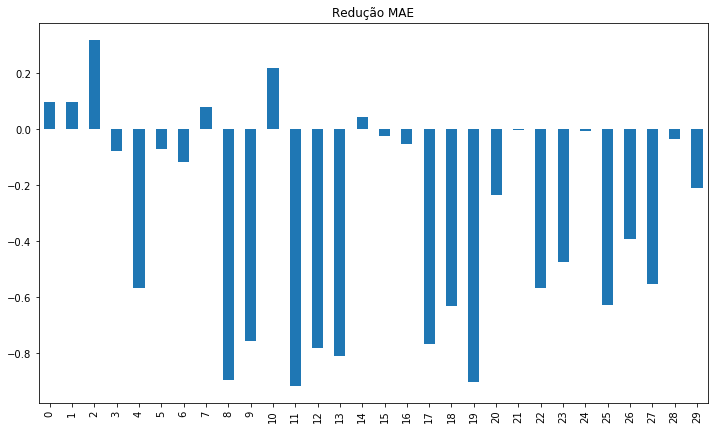

In [93]:
mae_base_raw = mean_absolute_error(yval, p_base, multioutput='raw_values')
mae_rf_raw = mean_absolute_error(yval, p, multioutput='raw_values')

lift = pd.Series(mae_rf_raw / mae_base_raw - 1)
f,a = pylab.subplots(1,1, figsize=(12,7))
#a[0].axhline(y=1, color='k')
lift.plot.bar(ax=a, title='Redução MAE')

In [54]:
features = data.iloc[:, 1:42]

p = []


lift = []
for stage in [1,2]:
    for measure in range(15): 
        print("Stage {} - Measurement: {}".format(stage, measure))

        data['Y'] = data['Stage{}.Output.Measurement{}.U.Actual'.format(stage, measure)] - data['Stage{}.Output.Measurement{}.U.Setpoint'.format(stage, measure)]
        y = data['Y']

        Xtrain, Xval = features.iloc[:7000], features.iloc[7000:]
        ytrain = y.iloc[:7000]

        mdl = LGBMRegressor(n_estimators=100, learning_rate=0.003, num_leaves=2**6, 
                            subsample=0.75, subsample_freq=1, colsample_bytree=1., random_state=0)
        mdl.fit(Xtrain, ytrain)
        p.append(mdl.predict(Xval))
        
       

p_lg = np.vstack(p).T
mae_lg = mean_absolute_error(yval, p_lg)
print("LG MAE: {}".format(mae_lg))

Stage 1 - Measurement: 0
Stage 1 - Measurement: 1
Stage 1 - Measurement: 2
Stage 1 - Measurement: 3
Stage 1 - Measurement: 4
Stage 1 - Measurement: 5
Stage 1 - Measurement: 6
Stage 1 - Measurement: 7
Stage 1 - Measurement: 8
Stage 1 - Measurement: 9
Stage 1 - Measurement: 10
Stage 1 - Measurement: 11
Stage 1 - Measurement: 12
Stage 1 - Measurement: 13
Stage 1 - Measurement: 14
Stage 2 - Measurement: 0
Stage 2 - Measurement: 1
Stage 2 - Measurement: 2
Stage 2 - Measurement: 3
Stage 2 - Measurement: 4
Stage 2 - Measurement: 5
Stage 2 - Measurement: 6
Stage 2 - Measurement: 7
Stage 2 - Measurement: 8
Stage 2 - Measurement: 9
Stage 2 - Measurement: 10
Stage 2 - Measurement: 11
Stage 2 - Measurement: 12
Stage 2 - Measurement: 13
Stage 2 - Measurement: 14
LG MAE: 1.7263970559981128


https://scikit-learn.org/stable/modules/tree.html#multi-output-problems

## E se tunar o LGBM para cada um dos 30 Y?

In [17]:
?mean_absolute_error

Signature:
mean_absolute_error(
    y_true,
    y_pred,
    sample_weight=None,
    multioutput='uniform_average',
)
Docstring:
Mean absolute error regression loss

Read more in the :ref:`User Guide <mean_absolute_error>`.

Parameters
----------
y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape = (n_samples), optional
    Sample weights.

multioutput : string in ['raw_values', 'uniform_average']
    or array-like of shape (n_outputs)
    Defines aggregating of multiple output values.
    Array-like value defines weights used to average errors.

    'raw_values' :
        Returns a full set of errors in case of multioutput input.

    'uniform_average' :
        Errors of all outputs are averaged with uniform weight.


Returns
-------
loss : float or ndarray of floats
    If multioutput is 'ra